In [45]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [83]:
df = pd.read_csv('combined_matches_by_teams.csv')

In [84]:
df.drop(columns=['match_id', 'blue_team_region'], inplace=True)

In [85]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,False
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.6

### Set blue and orange wins to 1 or 0 instead of true and false

In [86]:
df['blue_winner'] = df.blue_winner.astype(int)

In [87]:
df['orange_winner'] = df.orange_winner.astype(int)

In [88]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,1,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,0
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,1,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.63,4893312.

### Split the data

In [106]:
def train_validate_test(df, rs, strat):
    """
    Splits data into 3 segments and stratifies on target
    requires the dataframe and target as args
    """
    train_val, test = train_test_split(df,
                                       train_size=0.82,
                                       random_state=rs,
                                        stratify=df[strat])
        
                                   
    train, validate = train_test_split(train_val,
                                       train_size=0.73,
                                       random_state=rs,
                                      stratify=train_val[strat])
                                     
    return train, validate, test

In [90]:
train, val, test = train_validate_test(df, 706)

In [91]:
train.shape, val.shape, test.shape

((2590, 98), (959, 98), (780, 98))

### Which color wins more?

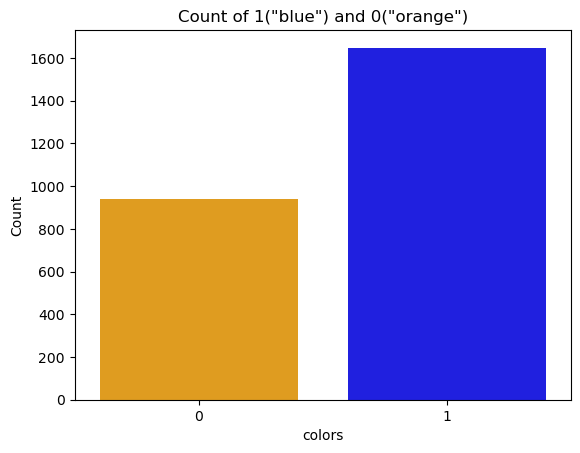

In [41]:
sns.countplot(x='blue_winner', data=train, palette=['orange', 'blue'])

# add axis labels and title
plt.xlabel('colors')
plt.ylabel('Count')
plt.title('Count of 1("blue") and 0("orange")')

# show the plot
plt.show()

In [42]:
train.blue_winner.value_counts(normalize=True)

1    0.636293
0    0.363707
Name: blue_winner, dtype: float64

### H$0$: There is no statistical difference in blue winner and orange winner
### H$a$: There is a statistical difference in blue winner and orange winner

In [55]:
alpha = 0.05

In [43]:
contingency_table = pd.crosstab(train.blue_winner, train.orange_winner)

In [53]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [56]:
if p_value < alpha:
    print('can reject null hypothesis')
else:
    print('faild to reject null hypothesis')

can reject null hypothesis


### do more demos per series lead to more wins? 

#### since the df used was a combined in the prep stage for each series played I'm gonna go back to the uncombined df to more easily groupby individual teams. 

In [99]:
df = pd.read_csv('matches_by_teams.csv')

In [101]:
df['winner'] = np.where(df['winner'], 1, 0)

In [107]:
train, val, test = train_validate_test(df, 706, 'winner')

In [108]:
train

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,boost_bpm,boost_bcpm,boost_avg_amount,boost_amount_collected,boost_amount_stolen,boost_amount_collected_big,boost_amount_stolen_big,boost_amount_collected_small,boost_amount_stolen_small,boost_count_collected_big,boost_count_stolen_big,boost_count_collected_small,boost_count_stolen_small,boost_amount_overfill,boost_amount_overfill_stolen,boost_amount_used_while_supersonic,boost_time_zero_boost,boost_time_full_boost,boost_time_boost_0_25,boost_time_boost_25_50,boost_time_boost_50_75,boost_time_boost_75_100,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
10144,62619161c437fde7e02d3d63,blue,6295d52cda9d7ca1c7bb154d,https://octane.gg/teams/154d-bronx,BRONX,South America,54.0,13.0,21.0,12.0,5853.0,24.074074,6302.0,6623.54431,765.68,37373.0,7145.0,24670.0,3278.0,12703.0,3867.0,309.0,43.0,1148.0,349.0,6798.0,1154.0,6975.0,583.17,511.98,1616.89,1098.06,992.33,1402.43,8080280.0,1053.55,2112.53,2090.49,2996.62,1946.84,313.11,109.01,1039.0,2442.73,1717.54,1096.33,3341.84,1914.74,3881.76,1374.82,20.0,19.0,3.0,1
9670,6261976cc437fde7e02d3e14,blue,6020c1bef1e4807cc70258d0,https://octane.gg/teams/58d0-pioneers,PIONEERS,Oceania,52.0,19.0,27.0,18.0,7632.0,36.538462,6070.0,6314.75585,769.19,38778.0,8891.0,27813.0,5776.0,10965.0,3115.0,353.0,68.0,949.0,278.0,7289.0,1090.0,4843.0,565.47,661.56,1634.54,1263.75,1079.60,1585.18,8451458.0,964.57,2288.70,2463.35,3133.24,2174.23,409.18,135.43,1456.0,2605.60,1823.85,1287.17,3599.49,2117.17,4208.56,1508.11,7.0,24.0,4.0,1
10013,625d717fc437fde7e02d3cbc,orange,6295e3a7da9d7ca1c7bb17e7,https://octane.gg/teams/17e7-monkey-rage-gaming,MONKEY RAGE GAMING,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5900,61e5c410c437fde7e02cce6a,blue,619e638ef8090ec74528dc29,https://octane.gg/teams/dc29-aipx-gaming,AIPX GAMING,Sub-Saharan Africa,42.0,14.0,8.0,13.0,4410.0,33.333333,3579.0,3812.24039,403.81,21814.0,5247.0,14898.0,2580.0,6916.0,2667.0,176.0,32.0,597.0,227.0,2670.0,624.0,2472.0,571.78,205.34,1426.72,596.69,493.59,638.06,4662956.0,445.71,1323.68,1464.68,1821.94,1273.33,138.82,62.89,681.0,1228.01,1079.74,926.31,1766.04,1468.03,2416.71,817.36,3.0,7.0,3.0,1
5099,61e5b725da9d7ca1c7ba519b,orange,61ee7bdbda9d7ca1c7ba5eb4,https://octane.gg/teams/5eb4-serenity,SERENITY,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,6159acd3143c37878b23848f,blue,6020bc70f1e4807cc7002386,https://octane.gg/teams/2386-rogue,ROGUE,North America,32.0,8.0,20.0,8.0,4533.0,25.000000,5148.0,5292.55787,555.92,29872.0,5818.0,20153.0,2945.0,9719.0,2873.0,236.0,34.0,824.0,233.0,3555.0,466.0,4105.0,545.37,370.95,1612.17,977.51,677.72,864.07,6100777.0,627.01,1671.82,1933.33,2389.04,1567.77,275.34,68.82,690.0,2073.90,1347.47,810.82,2797.27,1434.86,3068.99,1163.19,17.0,9.0,1.0,0
8693,62619951da9d7ca1c7bac470,orange,6189537af8090ec74528ba21,https://octane.gg/teams/ba21-friendly-fire-esp...,FRIENDLY FIRE ESPORTS,Asia-Pacific South,10.0,6.0,9.0,3.0,2271.0,60.000000,3659.

In [109]:
train.shape, val.shape, test.shape

((6341, 54), (2346, 54), (1907, 54))